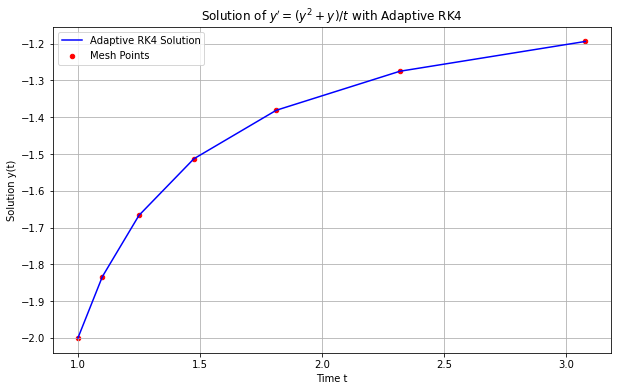

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rk4_step(f, t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + h/2, y + k1/2)
    k3 = h * f(t + h/2, y + k2/2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

def adaptive_rk4(f, t0, y0, tf, tol):
    t = t0
    y = y0
    h = 0.1  # initial step size
    ts = [t]
    ys = [y]
    while t < tf:
        y_next = rk4_step(f, t, y, h)
        y_double = rk4_step(f, t, y, h/2)
        y_double = rk4_step(f, t + h/2, y_double, h/2)
        error = np.abs(y_double - y_next)
        if error < tol:
            t += h
            y = y_double
            ts.append(t)
            ys.append(y)
            h *= min(1.5, (tol / error)**0.25)  # Increase step size
        else:
            h *= max(0.5, (tol / error)**0.25)  # Decrease step size
    return np.array(ts), np.array(ys)

def dy_dt(t, y):
    return (y**2 + y) / t

t0, y0, tf = 1, -2, 3
tolerance = 1e-4

ts, ys = adaptive_rk4(dy_dt, t0, y0, tf, tolerance)

plt.figure(figsize=(10, 6))
plt.plot(ts, ys, 'b-', label='Adaptive RK4 Solution')
plt.scatter(ts, ys, color='red', s=20, label='Mesh Points')
plt.xlabel('Time t')
plt.ylabel('Solution y(t)')
plt.title('Solution of $y\' = (y^2 + y)/t$ with Adaptive RK4')
plt.legend()
plt.grid(True)
plt.show()